##Autoencoders

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# Reshape the data to a 28x28x1 array
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
# Define the encoder architecture
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
encoder_outputs = layers.MaxPooling2D(2, padding="same")(x)

encoder = keras.Model(encoder_inputs, encoder_outputs, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [6]:
# Define the decoder architecture
decoder_inputs = keras.Input(shape=(4, 4, 8))
x = layers.Conv2D(8, 3, activation="relu", padding="same")(decoder_inputs)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
x = layers.UpSampling2D(2)(x)
decoder_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168

In [7]:
# Define the autoencoder as a sequential model
autoencoder = keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [8]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 90s 188ms/step - loss: 0.2126 - val_loss: 0.1414
Epoch 2/10
469/469 [==============================] - 85s 180ms/step - loss: 0.1318 - val_loss: 0.1232
Epoch 3/10
469/469 [==============================] - 85s 182ms/step - loss: 0.1201 - val_loss: 0.1159
Epoch 4/10
469/469 [==============================] - 83s 177ms/step - loss: 0.1144 - val_loss: 0.1114
Epoch 5/10
469/469 [==============================] - 87s 186ms/step - loss: 0.1107 - val_loss: 0.1082
Epoch 6/10
469/469 [==============================] - 89s 189ms/step - loss: 0.1081 - val_loss: 0.1064
Epoch 7/10
469/469 [==============================] - 84s 178ms/step - loss: 0.1061 - val_loss: 0.1041
Epoch 8/10
469/469 [==============================] - 85s 182ms/step - loss: 0.1044 - val_loss: 0.1027
Epoch 9/10
469/469 [==============================] - 83s 176ms/step - loss: 0.1032 - val_loss: 0.1013
Epoch 10/10
469/469 [==============================] - 83s 177ms/step - l

In [9]:
# Encode and decode the test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 4s 14ms/step


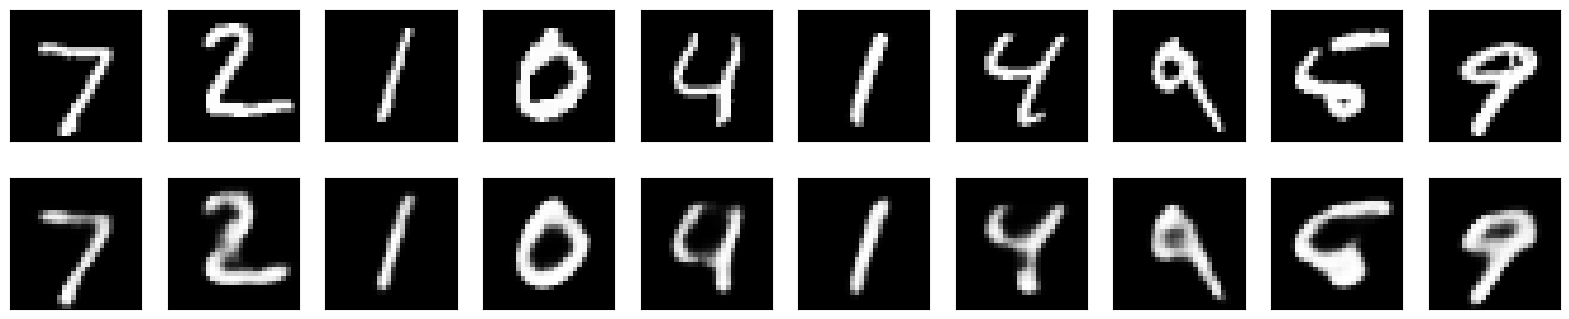

In [10]:
# Display the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##Vannilla Encoders

In [16]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [17]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [18]:
# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [19]:
# Reshape the input data to a vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [20]:
# architecture of vanilla encoders
input_dim = x_train.shape[1]

# Encoder network
encoder = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu')
])

# Decoder network
decoder = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(32,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(input_dim, activation='sigmoid')
])

In [21]:
# Autoencoder model
autoencoder = keras.Sequential([encoder, decoder])

In [22]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 18ms/step - loss: 0.2461 - val_loss: 0.1666
Epoch 2/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1512 - val_loss: 0.1384
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1322 - val_loss: 0.1241
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1209 - val_loss: 0.1155
Epoch 5/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1143 - val_loss: 0.1105
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1104 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1076 - val_loss: 0.1056
Epoch 8/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1051 - val_loss: 0.1028
Epoch 9/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1029 - val_loss: 0.1011
Epoch 10/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1014 - val_lo

In [23]:
# Compressed representation of test data
compressed_data = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
# Reconstructed test data
reconstructed_data = decoder.predict(compressed_data)

313/313 [==============================] - 1s 2ms/step


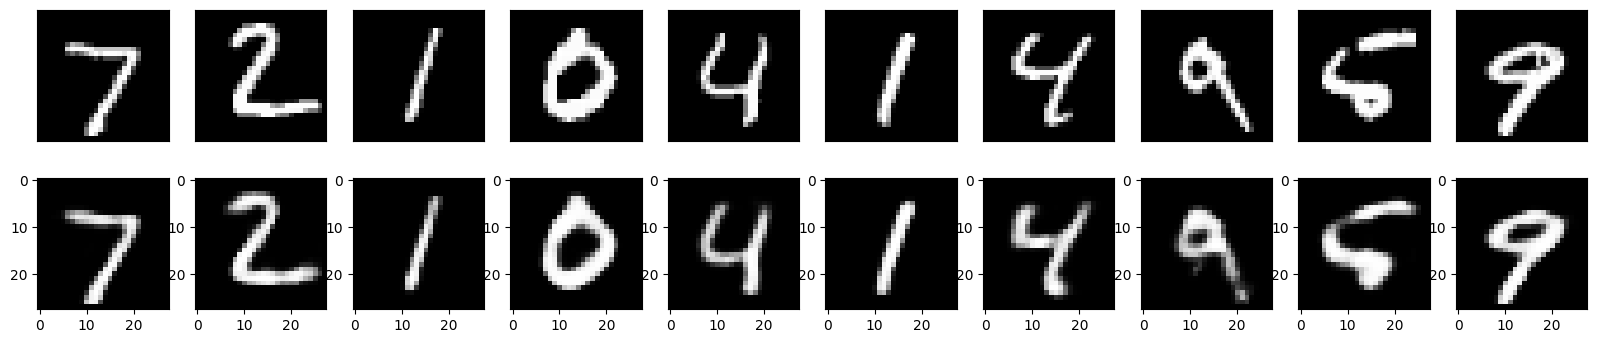

In [25]:
# Display the original test data and the reconstructed data
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(reconstructed_data[i].reshape(28, 28))
    plt.gray()

##Denoising encoder

In [26]:
# importing library
import numpy as np
from tensorflow import keras

In [27]:
# Load MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [28]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [29]:
# Flatten images into a vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [30]:
# Add noise to input data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [31]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define input layer
input_img = Input(shape=(784,))

# Define encoding layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define decoding layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Define autoencoder model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train model
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/50
235/235 [==============================] - 7s 24ms/step - loss: 0.2565 - val_loss: 0.1958
Epoch 2/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1830 - val_loss: 0.1712
Epoch 3/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1655 - val_loss: 0.1585
Epoch 4/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1554 - val_loss: 0.1508
Epoch 5/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1489 - val_loss: 0.1450
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1444 - val_loss: 0.1417
Epoch 7/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1412 - val_loss: 0.1390
Epoch 8/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1386 - val_loss: 0.1366
Epoch 9/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1361 - val_loss: 0.1344
Epoch 10/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1338 - val_lo

313/313 [==============================] - 1s 3ms/step


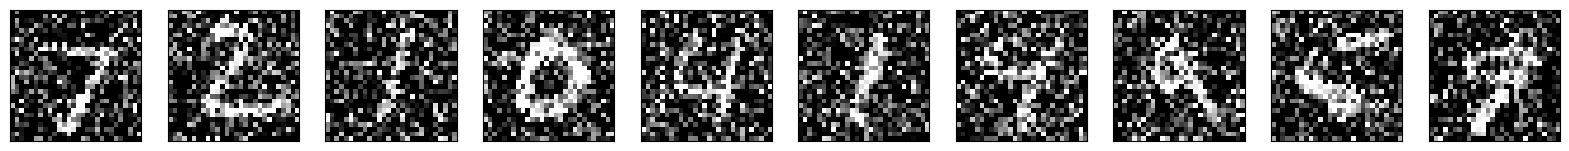

In [32]:
# Use the trained autoencoder for denoising
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original images and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

##Convolution Encoder

Epoch 1/10
469/469 [==============================] - 83s 175ms/step - loss: 0.2155 - val_loss: 0.1456
Epoch 2/10
469/469 [==============================] - 82s 175ms/step - loss: 0.1339 - val_loss: 0.1241
Epoch 3/10
469/469 [==============================] - 81s 174ms/step - loss: 0.1209 - val_loss: 0.1161
Epoch 4/10
469/469 [==============================] - 85s 181ms/step - loss: 0.1148 - val_loss: 0.1120
Epoch 5/10
469/469 [==============================] - 84s 178ms/step - loss: 0.1112 - val_loss: 0.1096
Epoch 6/10
469/469 [==============================] - 82s 175ms/step - loss: 0.1085 - val_loss: 0.1065
Epoch 7/10
469/469 [==============================] - 83s 178ms/step - loss: 0.1066 - val_loss: 0.1049
Epoch 8/10
469/469 [==============================] - 81s 173ms/step - loss: 0.1052 - val_loss: 0.1038
Epoch 9/10
469/469 [==============================] - 81s 174ms/step - loss: 0.1039 - val_loss: 0.1022
Epoch 10/10
313/313 [==============================] - 4s 13ms/step


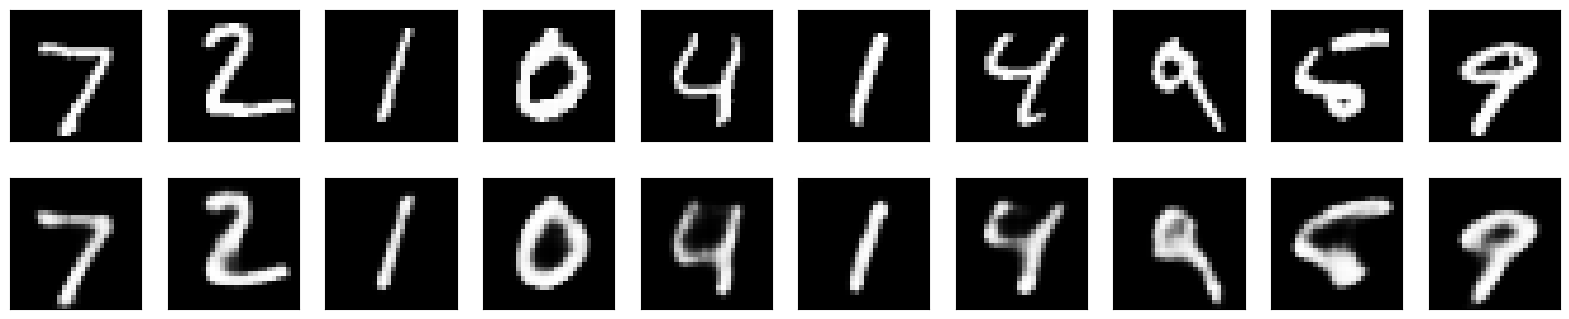

In [33]:
# Import libraries and load MNIST dataset
from tensorflow import keras
from tensorflow.keras import layers

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize pixel values and add channel dimension
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

# Define the CAE architecture
input_img = keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the model
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Use the trained autoencoder for compression and reconstruction
decoded_imgs = autoencoder.predict(x_test)

# Display original images and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##Recurrent Encoder

In [34]:
import numpy as np
from tensorflow import keras

# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to a 3D tensor
x_train = np.reshape(x_train, (len(x_train), 28, 28))
x_test = np.reshape(x_test, (len(x_test), 28, 28))

In [35]:
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (28, 28)

# Define the encoder model
inputs = Input(shape=input_shape)
encoded = LSTM(64, activation='relu')(inputs)

# Define the decoder model
decoded = RepeatVector(28)(encoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
decoded = TimeDistributed(keras.layers.Dense(28, activation='sigmoid'))(decoded)

# Define the autoencoder model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 56s 110ms/step - loss: 0.2627 - val_loss: 0.1910
Epoch 2/10
469/469 [==============================] - 52s 110ms/step - loss: 0.1686 - val_loss: 0.1488
Epoch 3/10
469/469 [==============================] - 51s 110ms/step - loss: 0.1424 - val_loss: 0.1320
Epoch 4/10
469/469 [==============================] - 53s 112ms/step - loss: 0.1293 - val_loss: 0.1252
Epoch 5/10
469/469 [==============================] - 53s 114ms/step - loss: 0.1213 - val_loss: 0.1183
Epoch 6/10
469/469 [==============================] - 54s 114ms/step - loss: 0.1161 - val_loss: 0.1118
Epoch 7/10
469/469 [==============================] - 53s 112ms/step - loss: 0.1117 - val_loss: 0.1095
Epoch 8/10
469/469 [==============================] - 52s 111ms/step - loss: 0.1086 - val_loss: 0.1058
Epoch 9/10
469/469 [==============================] - 52s 111ms/step - loss: 0.1061 - val_loss: 0.1032
Epoch 10/10
469/469 [==============================] - 52s 111ms/step - l

313/313 [==============================] - 5s 14ms/step


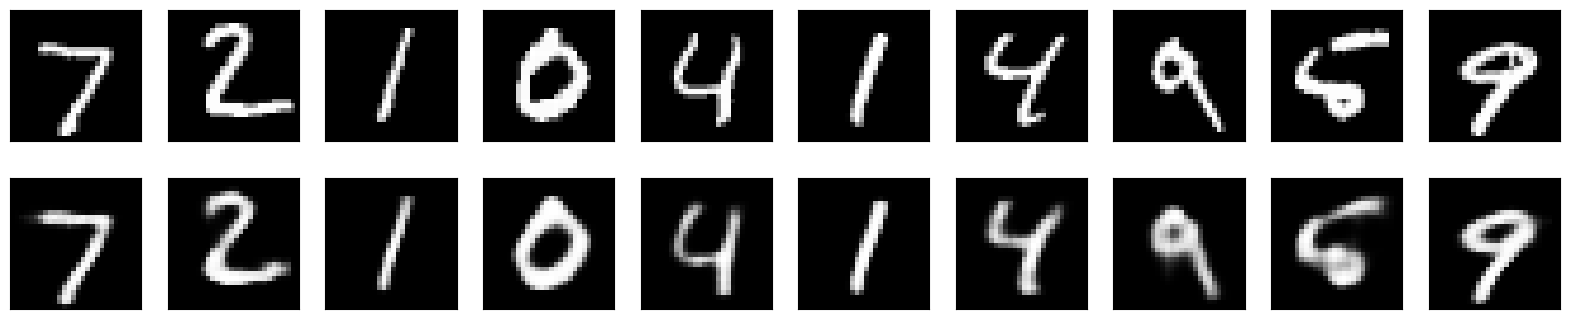

In [37]:
decoded_imgs = autoencoder.predict(x_test)

# Display the original and reconstructed images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

##Sparse Encoder

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.6615 - val_loss: 0.6155
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.5832 - val_loss: 0.5535
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.5275 - val_loss: 0.5038
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.4827 - val_loss: 0.4638
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.4466 - val_loss: 0.4314
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.4174 - val_loss: 0.4050
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.3935 - val_loss: 0.3834
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3739 - val_loss: 0.3656
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3577 - val_loss: 0.3508
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3442 - val_lo

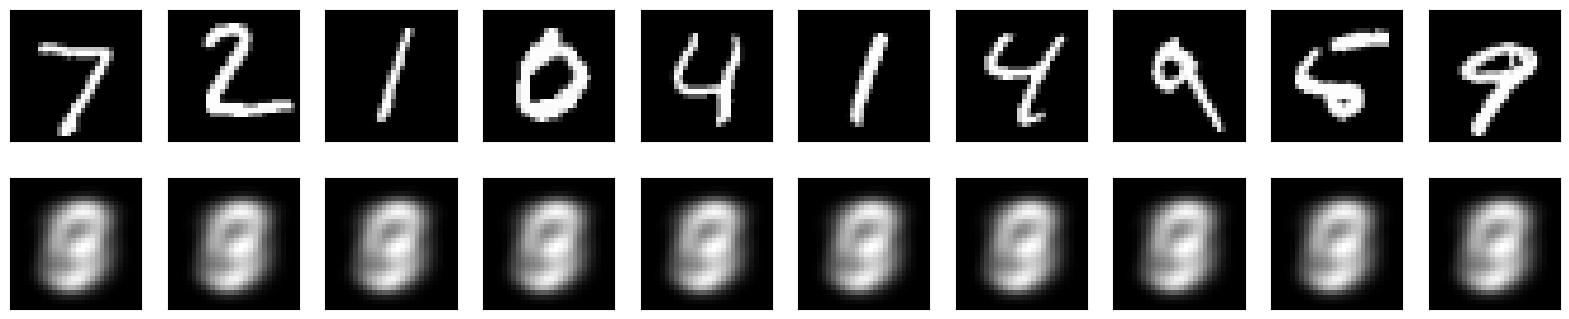

In [38]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images into 1D arrays
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the input shape
input_shape = (784,)

# Define the sparsity constraint (use 10% sparsity)
rho = 0.1

# Define the size of the encoded representation
encoding_dim = 32

# Define the input layer
input_img = Input(shape=input_shape)

# Define the encoded layer with sparsity constraint
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(rho))(input_img)

# Define the decoded layer
decoded = Dense(784, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Use the trained autoencoder for compression and reconstruction
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original images and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

##Autoencoders - Feature extraction

Epoch 1/50
235/235 [==============================] - 5s 17ms/step - loss: 0.2445 - val_loss: 0.1628
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1445 - val_loss: 0.1277
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1191 - val_loss: 0.1093
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1047 - val_loss: 0.0981
Epoch 5/50
235/235 [==============================] - 4s 19ms/step - loss: 0.0953 - val_loss: 0.0906
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0888 - val_loss: 0.0852
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0842 - val_loss: 0.0815
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0811 - val_loss: 0.0791
Epoch 9/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0790 - val_loss: 0.0773
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0775 - val_lo

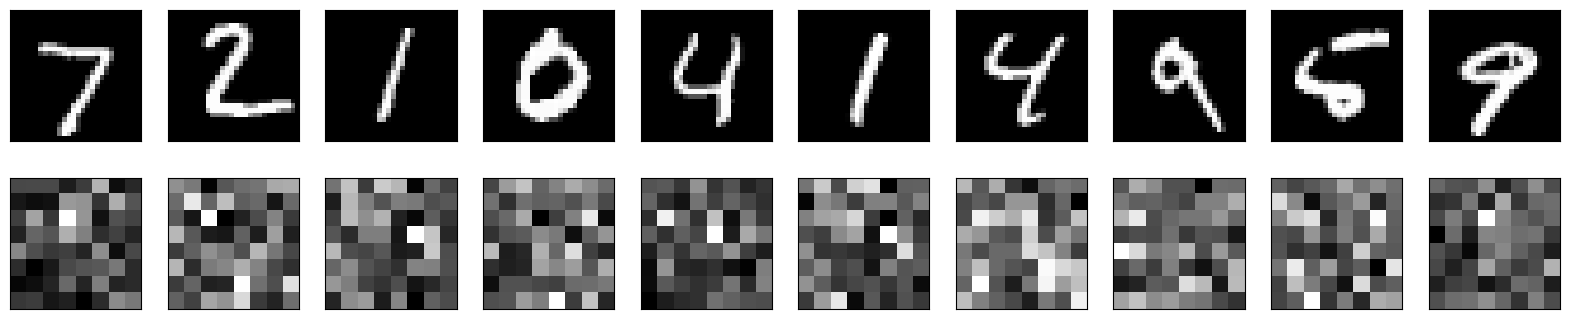

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Extract the encoded features
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Plot the encoded features
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the encoded feature vector
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(encoded_imgs[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##Autoencoders - Dimentionality reduction

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2765 - val_loss: 0.1911
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1710 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1443 - val_loss: 0.1338
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1288 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1183 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1112 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1060 - val_loss: 0.1025
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1021 - val_loss: 0.0994
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0993 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0974 - val_lo

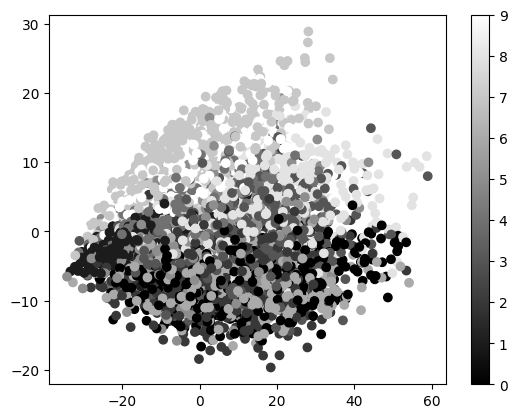

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images to 784-dimensional vectors
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define autoencoder architecture
input_dim = 784
encoding_dim = 32

input_layer = keras.Input(shape=(input_dim,))
encoder = keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = keras.layers.Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = keras.models.Model(inputs=input_layer, outputs=decoder)

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
history = autoencoder.fit(x_train_flat, x_train_flat,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_flat, x_test_flat))

# Use encoder to encode input data into a lower-dimensional representation
encoder_model = keras.models.Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(x_test_flat)

# Plot encoded data in 2D using first two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
encoded_pca = pca.fit_transform(encoded_data)

plt.scatter(encoded_pca[:, 0], encoded_pca[:, 1], c=y_test)
plt.colorbar()
plt.show()

##Autoencoders - classification

In [13]:
from keras.layers import Input, Dense
from keras.models import Model

# Load MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images to 1D array
input_dim = 784
x_train = x_train.reshape(-1, input_dim)
x_test = x_test.reshape(-1, input_dim)

# Define autoencoder architecture
encoding_dim = 32
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2778 - val_loss: 0.1898
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1697 - val_loss: 0.1523
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1436 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1282 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1179 - val_loss: 0.1125
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1107 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1055 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1018 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0992 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0974 - val_lo

In [14]:
# Extract compressed representations of MNIST images
encoder = Model(input_img, encoded)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# Define feedforward classifier
clf_input_dim = encoding_dim
clf_output_dim = 10
clf_input = Input(shape=(clf_input_dim,))
clf_output = Dense(clf_output_dim, activation='softmax')(clf_input)
classifier = Model(clf_input, clf_output)

# Compile classifier
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train classifier
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=clf_output_dim)
y_test_categorical = to_categorical(y_test, num_classes=clf_output_dim)
classifier.fit(x_train_encoded, y_train_categorical,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test_encoded, y_test_categorical))


313/313 [==============================] - 0s 1ms/step
Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 4.9830 - accuracy: 0.2230 - val_loss: 2.7387 - val_accuracy: 0.4077
Epoch 2/50
235/235 [==============================] - 1s 2ms/step - loss: 1.8983 - accuracy: 0.5324 - val_loss: 1.3369 - val_accuracy: 0.6283
Epoch 3/50
235/235 [==============================] - 1s 2ms/step - loss: 1.0549 - accuracy: 0.6903 - val_loss: 0.8236 - val_accuracy: 0.7440
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.7276 - accuracy: 0.7753 - val_loss: 0.6121 - val_accuracy: 0.8082
Epoch 5/50
235/235 [==============================] - 1s 2ms/step - loss: 0.5796 - accuracy: 0.8221 - val_loss: 0.5131 - val_accuracy: 0.8415
Epoch 6/50
235/235 [==============================] - 1s 2ms/step - loss: 0.5008 - accuracy: 0.8480 - val_loss: 0.4534 - val_accuracy: 0.8616
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 

##Autoencoder - Anomoly detection

Epoch 1/50
235/235 [==============================] - 5s 18ms/step - loss: 0.2782 - val_loss: 0.1923
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1722 - val_loss: 0.1543
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1453 - val_loss: 0.1349
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1293 - val_loss: 0.1220
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1186 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1111 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1060 - val_loss: 0.1026
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1023 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0995 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0976 - val_lo

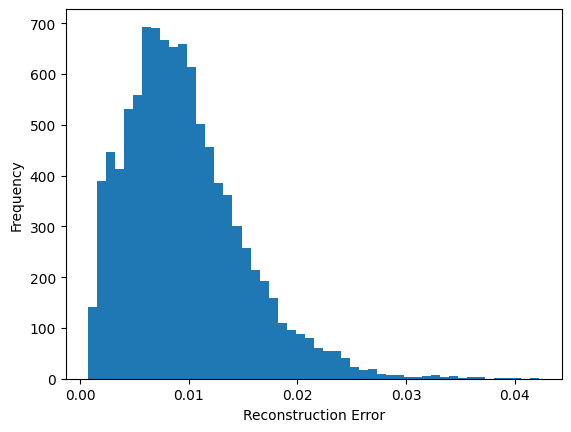

<Figure size 2000x400 with 0 Axes>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the architecture of the autoencoder
input_dim = x_train.shape[1]
encoding_dim = 32

input_layer = keras.layers.Input(shape=(input_dim,))
encoder = keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = keras.layers.Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = keras.models.Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder on normal data
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Use the trained autoencoder to reconstruct new data points
decoded_imgs = autoencoder.predict(x_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data points
mse = np.mean(np.power(x_test - decoded_imgs, 2), axis=1)

# Plot the reconstruction error distribution
plt.hist(mse, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

# Set a threshold for anomaly detection
threshold = np.max(mse)

# Find the indices of the anomalous data points
anomalies = np.where(mse > threshold)[0]

# Plot the anomalous data points
n = min(len(anomalies), 10)
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[anomalies[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[anomalies[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()